In [2]:
#importing the required packages
import pandas as pd
import numpy as np


In [3]:
# Load Dataset
seg = pd.read_csv("/content/Mall_Customers.csv")
seg


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
 #Display first seven rows

 print(seg.head(7))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6


In [5]:
 #Display last five rows

 print(seg.tail())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [6]:
seg.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [7]:
print("Basic Information")
print(seg.info())

Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [8]:
seg.shape

(200, 5)

In [9]:
seg.count()

,0
CustomerID,200
Gender,200
Age,200
Annual Income (k$),200
Spending Score (1-100),200


In [18]:
#For checking the missing values
print(seg.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
print(seg.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [13]:
#importing packages for further
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x700 with 0 Axes>

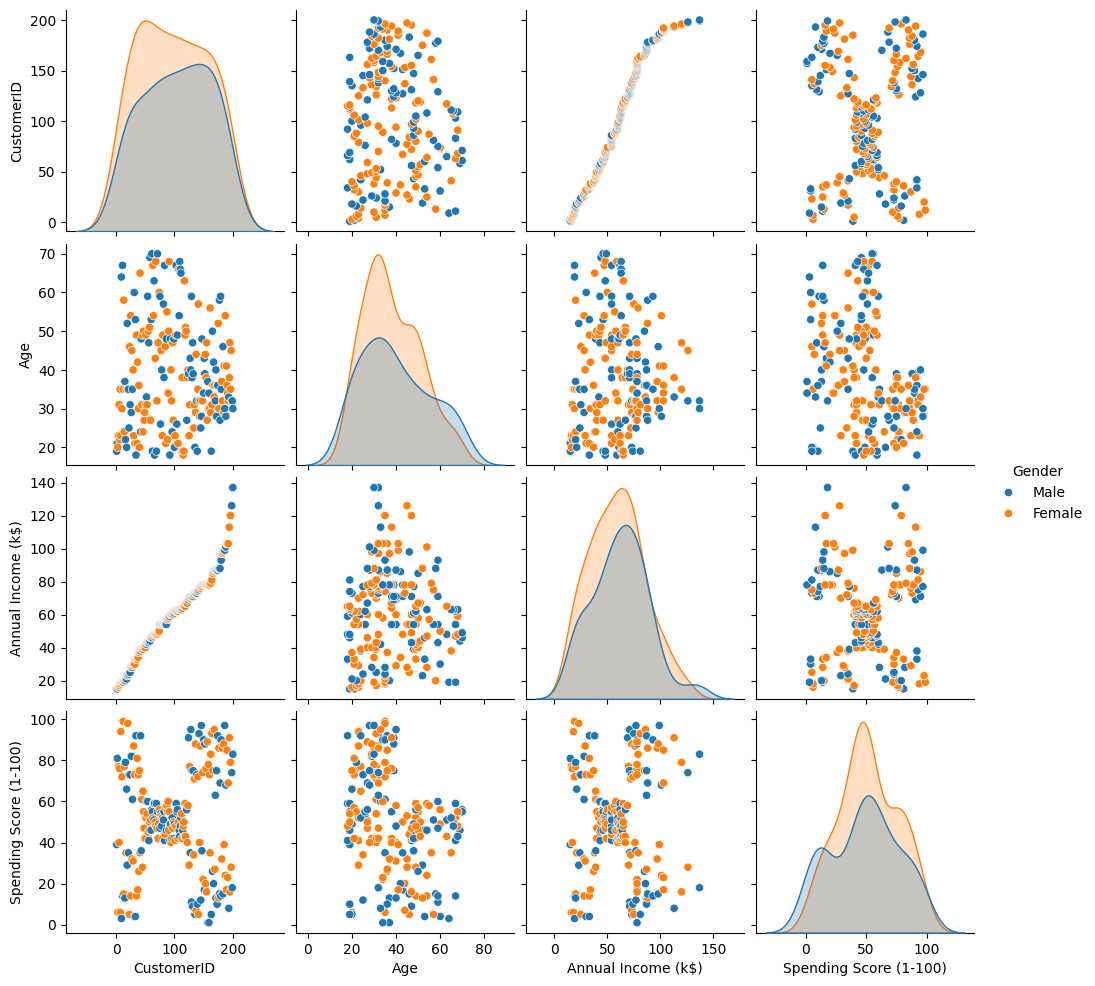

In [17]:
plt.figure(figsize=(10,7))
sns .pairplot(seg,hue="Gender")
plt.show()

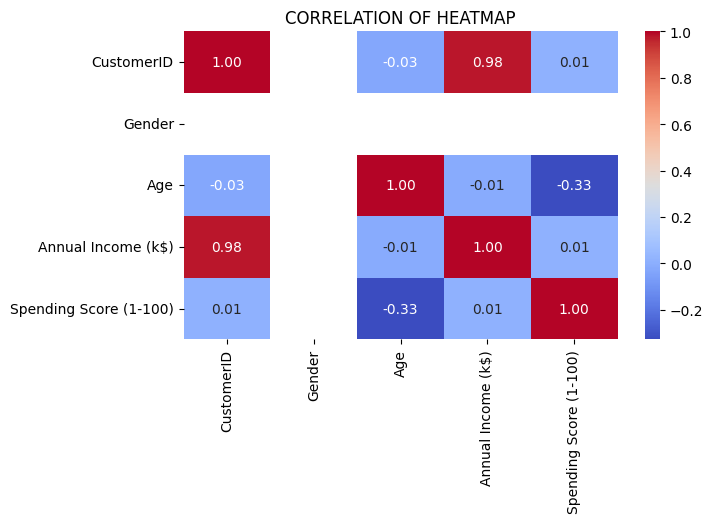

In [22]:
plt.figure(figsize=(7,4))

#Convert 'Gender' column to numeric before calculating correlation

seg_numeric=seg.copy()
seg_numeric['Gender']=pd.to_numeric(seg_numeric['Gender'],errors='coerce')
sns.heatmap(seg_numeric.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("CORRELATION OF HEATMAP")
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

#Convert Gender into numeric values(Male=0,Female)
encoder=LabelEncoder()
seg["Gender"]=encoder.fit_transform(seg["Gender"])
print("\n UPDATED DATA :")
print(seg.head())


 UPDATED DATA :
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


In [25]:
#Select only relevant features for clustering
X=seg[["Age","Annual Income (k$)","Spending Score (1-100)"]]

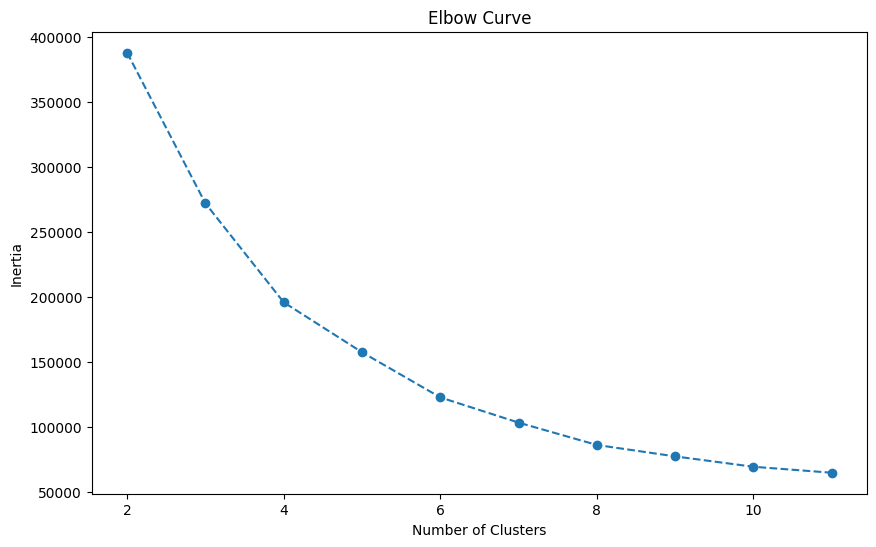

In [31]:
from sklearn.cluster import KMeans
inertia=[] #Stores sum of squared distances
K=range(2,12)
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(seg)
    inertia.append(kmeans.inertia_)

#Plot Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(K,inertia,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [27]:
kmeans=KMeans(n_clusters=7,random_state=42,n_init=10)
seg["Cluster"]=kmeans.fit_predict(X)

print("\n Cluster Assignments:")
print(seg[["CustomerID","Cluster"]].head())


 Cluster Assignments:
   CustomerID  Cluster
0           1        5
1           2        0
2           3        5
3           4        0
4           5        5


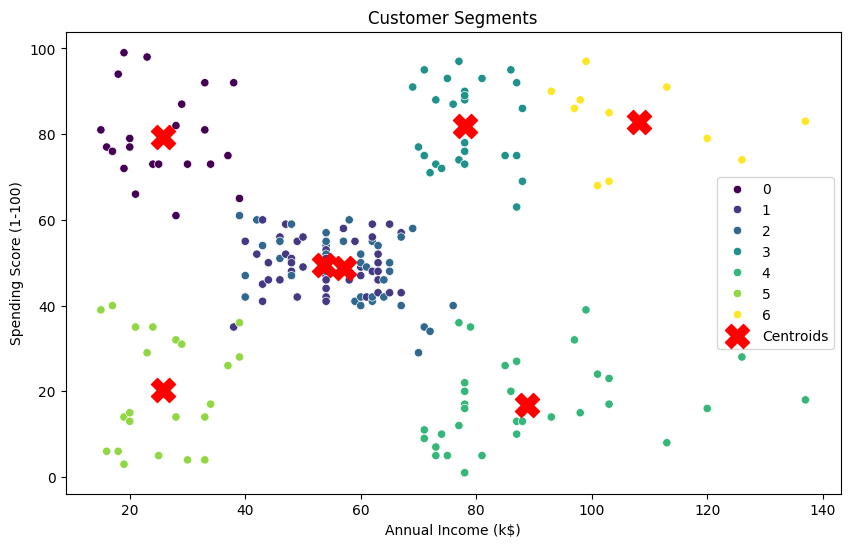

In [30]:
import numpy as np

plt.figure(figsize=(10,6))

sns.scatterplot(x=seg["Annual Income (k$)"], y=seg["Spending Score (1-100)"], hue=seg["Cluster"], palette="viridis")

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c="red", marker="X", label="Centroids")

plt.xlabel("Annual Income (k$)")

plt.ylabel("Spending Score (1-100)")

plt.title("Customer Segments")

plt.legend()

plt.show()